In [103]:
#pip install pandas openpyxl

In [104]:
#pip install seaborn

In [105]:
#pip install pyplot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime

In [2]:
data = pd.read_csv('furniture_22-24.csv', sep = ';', encoding ='windows-1251')

In [3]:
pd.set_option('display.max_colwidth', None)              # Установите None для неограниченной ширины
pd.options.display.float_format = '{:,.2f}'.format       # Отображение чисел в таблице в более удобном формате 

### Обработка типов данных, добавление необходимых столбцов

In [4]:
data['is_promo'] = data['is_promo'].apply(lambda x: 1 if x != 0 else 0)   # преобразование столбца 'is_promo' к виду True / False
data['Date'] = pd.to_datetime(data['Date'])                               # преобразовали в дату
data['is_promo'] = data['is_promo'].astype(bool)                          # преобразовали is_promo в bool
data['IsKGT'] = data['IsKGT'].astype(bool)                                # преобразовали IsKGT в bool


data['YYYYMM'] = data['Date'].dt.to_period('M')                           # создание нового столбца 'Year_Month' с форматом 'YYYY-MM'
data['Year'] = data.Date.dt.year                                          # создание столбца с годами
data['Week_day'] = data.Date.dt.day_name()                                # создание столбца с днём недели

data['weighted_rating'] = data['this_day_avg_reviews_rating'] * data['this_day_reviews_cnt']

### Обработка пропусков

 ##### всего в датафрейме - 9 788 560 строк 

Есть 7040 пропусков в столбце Brand, на все эти пропуски приходится 68 млн руб, это примерно 0.06% от всех продаж. Самая крупная категория товаров располагается у нас под брендов "Нет бренда", предлагаю определить все Null Brand -> "Нет бренда"

В столбцах 'uniq_session_view' и 'uniq_client_view' пропущены данные за 2022 год, это может быть связано с отсутствием данных или изменением методологии сбора этих данных. Т.к. данные появляются одновременно с продажами, то бессмысленно использовать их в качестве независимой переменной. Предлагаю просто проанализировать все имеющиеся данные в этих столбцах, попытаться найти взаимосвязи, в дальнейшем подумать - как можно использовать найденные взаимосвязи в рамках поставленной задачи

В столбце ItemName есть 6 пропущенных значений -> это SKU одного и того же бренда, у них даже одинаковая кат4. Предлагаю дать им стандартное название - "Матрас беспружинный DAVI SLEEP"

In [126]:
# Установка максимальной ширины отображаемого текста
pd.set_option('display.max_colwidth', None)  # Установите None для неограниченной ширины

data['Brand'] = data['Brand'].fillna('Нет бренда')                                       # заполнили все Null значения в столбце бренд - "Нет бренда"
data['ItemName'] = data['ItemName'].fillna('Матрас беспружинный DAVI SLEEP')             # заполнили все Null значения в столбце имя товара - "Матрас беспружинный DAVI SLEEP"

## Описание


1. Date - столбец с датами. Рассматриваемый в датафрейме временной промежуток - с 2022/01/01 по 2024/12/31
2. DeliverySchemaID - схема доставки товара до пользователя. Принимает 3 уникальных значения. 1 - FBO (склад и логистика МП), 2 - FBS (склад селлера и логистика МП), 4 - RFBS (склад и логистика селлера)
3. Category1 - название категории 1-го уровня. Принимает одно уникальное значение ('Furniture')
4. Category2 - название категории 2-го уровня. Принимает три уникальных значения - 'Мебель для сна', 'Столы и стулья', 'Мягкая мебель'
5. Category3 - название категории 3-го уровня. Состоит из 21 категории товаров ('Кровать', 'Матрас', 'Журнальный столик'...)
6. Category4 - название категории 4-го уровня. Состоит из 56 категорий товаров ('Двухъярусные кровати', 'Кровати для детей от 3 лет'...)
7. Brand - бренд, к которому принадлежит товар. Всего в нашем датафрейме 7285 уникальных брендов
8. ItemID - уникальный идентификатор товара. Всего в нашем датафрейме 716 751 уникальная товарная единица
9. Is_promo - участововал ли товар в данный день в акции? (True / False)
10. ItemName - наименование товара. В нашем датафрейме 441 147 уникальных наименований. Заметим, что это куда меньше, чем кол-во уникальных ID товаров. Можно заключить, что названия товаров могут повторяться.
11. MerchantID - уникальный идентификатор магазина на МП. В нашем датафрейме 20490 магазинов.
12. IsKGT - является ли товар крупногабаритным? (True / False)
13. uniq_session_view - кол-во уникальных сессионных просмотров. Один пользователь зашел с айфона и ПК = 2 просмотра.
14. uniq_client_view - кол-во уникальных просмотров пользователей. Один пользователь зашел с айфона и ПК = 1 просмотр.
15. this_day_reviews_cnt - кол-во отзывов на товар в данный день
16. this_day_avg_reviews_rating - средний рейтинг отзывов из п.15
17. sales_rub - продажи в рублях (доставленные заказы за вычетом возвратов)
18. qty - продажи в штуках (доставленные заказы за вычетом возвратов)
19. sales_rub_acc - принятые заказы в рублях
20. qty_acc - принятые заказы в штуках
21. qty - продажи в литрах (доставленные заказы за вычетом возвратов)

### Основные описательные статистики

Таблица ниже даёт нам представление о том, как устроены данные в нашем датафрейме.

Просмотры:
- столбцы 'uniq_session_view' и 'uniq_client_view' дают нам информацию о кол-ве ежедневных просмотров товара. 
- Можно заметить очень сильную разницу между медианой и средним значением просмотров. Это является существенным маркером того, что в данных колонках присутствуют выбросы, т.е. в определенные дни происходили аномально высокие просмотры каких-то товаров. Скорее всего, это случаи ТВ-распродажи, карточки, которые размещались на главной странице маркетплейса
- можно увидеть, что в среднем продаваемый товар смотрят около 260-280 человек в день
- максимальное значение просмотров в 1 день доходило почти до 1 млн человек на товар


Отзывы:
- столбцы 'this_day_reviews_cnt' и 'this_day_avg_reviews_rating' дают нам информацию об отзывах на товары. 
- без дополнительной обработки приведённые описательные статистики малоинформативны. Это связано с тем, что строки исходного датафрейма заточены на продажи товаров по дням. Не все пользователи оставляют отзывы на товары, поэтому фиксируется большое кол-во дней, когда продажа была, но отзыва оставлено не было, поэтому данные метрики так сильно сосредотачиваются вокруг 0
- тем не менее, мы всё же можем проверить информацию в данных столбцах на соответствие здравой логике, проверить наличие аномальных или невозможных значений. У нас нет отрицательных значений для выставленного рейтинга и кол-ва отзывов. Это соответствует здравой логике. Максимальный рейтинг = 5, минимальный = 0, но это всего лишь дни в которые не было поставлено оценок, а не выставленные оценки. 

Продажи:
- столбцы 'sales_rub' и 'qty' дают нам информацию о средних продажах товара в день
- минимальные значения в данных столбцах уходят в отрицательную плоскость, это нормально. Отрицательные значения свидетельствуют о возвратах товара в данный день, т.е. в какой-то из дней на рассматриваемом промежутке какой-то товар был возвращен на сумму 374 675 руб, тоже самое корректно сказать и про кол-во штук, причём необязательно чтобы это был один и тот же товар. У нас могли вернуть абсолютно разные товары - например, вернули один кухонный гарнитур стоимостью почти 400 тыс.руб., а в другой день 98 подушек. Минимумы в данных столбцах могут быть не связаны между собой. 
- В среднем заказ состоит из 1 товара и имеет стоимость около 7000 рублей (берём медианы, средние смещены из-за выбросов)
- Максимальные продажи товара составляют почти 5.5 млн руб. Интересно заметить, что максимальные принятые заказы одного товара составляют всего лишь 1.5 млн руб. Один из случаев когда такое может возникнуть - это если пользователь заказывал один и тот же товар несколько дней к ряду. Например, пользователь заказал на 1.5 млн руб в первый день, товары на складе закончились, он больше не смог заказать. Через 2 дня поставщик осуществил новую поставку, пользователь купил товары ещё на 1 млн руб, и так несколько дней - а забрал все эти товары пользователь в 1 день, поэтому принятые заказы не превышают 1.5 млн руб, а доставленные заказы составляют 5.5 млн руб. Безусловно, это всего лишь один из вариантов развития событий, и, на самом деле, всё могло обстоять иным образом. 

Литры:
- столбец 'liters' отвечает за объём товара в литрах
- важно заметить, что данные уже агрегированы до дат, поэтому если мы хотим посмотреть объём каждого товара, то нам нужно будет разделить столбец 'liters' на столбец 'qty', так мы получим объём 1 штуки проданного товара 
- как можно увидеть, общий средний объём продаваемого товара (медиана) составляет 128 литров. По размерам это соответствует среднестатистической прикроватной тумбе в собранном виде. 

In [127]:
data_stat = data[['uniq_session_view', 'uniq_client_view', 'this_day_reviews_cnt', 'this_day_avg_reviews_rating', 'sales_rub', 'qty', 'liters']]

# Получение описательной статистики
description = data_stat.describe()

styled_description = description.style.set_table_attributes('style="font-size: 14px; border-collapse: collapse;"') \
                                        .set_caption("Описательная статистика") \
                                        .set_table_styles(
                                            [
                                                {'selector': 'th', 'props': [('background-color', '#f1f2f9'), ('color', 'black')]},
                                                {'selector': 'td', 'props': [('color', 'black')]},  # Цвет текста для ячеек
                                                {'selector': 'tr:nth-child(even) td', 'props': [('background-color', '#f1f2f9')]},  # Четные строки
                                                {'selector': 'tr:nth-child(odd) td', 'props': [('background-color', 'white')]}]  # Нечетные строки
                                        ).format("{:,.0f}")
# Отображение
styled_description

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788560 entries, 0 to 9788559
Data columns (total 25 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   Date                         datetime64[ns]
 1   DeliverySchemaID             int64         
 2   Category1                    object        
 3   Category2                    object        
 4   Category3                    object        
 5   Category4                    object        
 6   Brand                        object        
 7   ItemID                       int64         
 8   is_promo                     bool          
 9   ItemName                     object        
 10  MerchantID                   int64         
 11  IsKGT                        bool          
 12  uniq_session_view            int64         
 13  uniq_client_view             int64         
 14  this_day_reviews_cnt         int64         
 15  this_day_avg_reviews_rating  float64       
 16  

### Корреляция метрик

- как можно увидеть, существует очень сильная положительная корреляция между метриками просмотров 'uniq_session_view' и 'uniq_client_view', поэтому в дальнейшем можно использовать лишь один из этих показателей.
- 'this_day_reviews_cnt' коррелирует со средним рейтингом, а также с метриками, характеризующими объёмы продаж товара. Это логично, чем больше люди покупают товар, тем больше отзывов на него будет даваться в дальнейшем
- метрика 'sales_rub' коррелирует сильно с метриками, которые завязаны на продажах - кол-во проданных штук, кол-во проданных товаров в литрах, принятые заказы в рублях и тд. Также сущесвует умеренная корреляция продаж с просмотрами товаров, а также с их рейтингом.

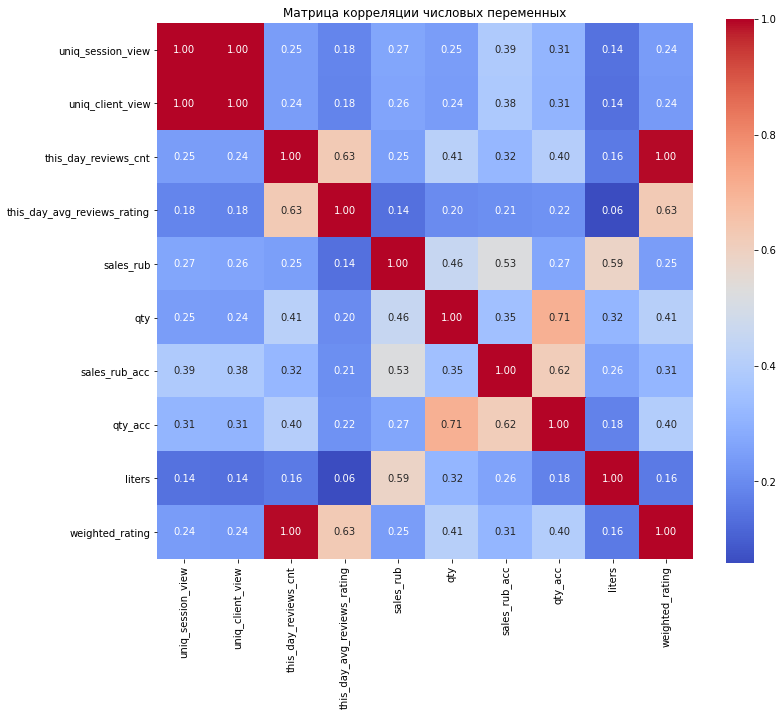

In [173]:
corr_data = data[['uniq_session_view','uniq_client_view','this_day_reviews_cnt','this_day_avg_reviews_rating','sales_rub','qty','sales_rub_acc','qty_acc','liters','Week_day','weighted_rating']]
numeric_furniture = corr_data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_furniture.corr()

# визуализация
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Матрица корреляции числовых переменных")
plt.show()

### Работа со столбцом Category2

Как можно сперва увидеть, категории 'Мебель для сна' и 'Столы и стулья' на протяжении всего рассматриваемого промежутка времени имеют сопоставимые размеры. Категория 'Мягкая мебель' составляет от 60 до 70% от размера категории 'Мебель для сна'.
  


In [129]:
data \
    .groupby(['Year','Category2'], as_index = False) \
    .agg({'sales_rub': 'sum'}) \
    .pivot_table(columns = 'Year', values = 'sales_rub', index = 'Category2')


Year                       2022              2023              2024
Category2                                                          
Мебель для сна 5,830,246,446.65 14,705,683,567.88 23,674,151,792.57
Мягкая мебель  3,484,490,639.02  9,624,000,089.90 16,575,665,699.90
Столы и стулья 5,142,307,138.10 12,919,594,444.02 21,085,747,966.26

- На данном графике можно впервые увидеть наличие сезонности в данных. Особо выраженные пики продаж заметны в декабре.

In [130]:
data_cat2 = data.groupby(['YYYYMM', 'Category2'], as_index=False).agg({'sales_rub': 'sum'})
data_cat2['YYYYMM'] = data_cat2['YYYYMM'].astype(str)

fig = px.bar(data_cat2, 
              x='YYYYMM', 
              y='sales_rub', 
              color='Category2', 
              title='Продажи по кат-2 по месяцам',
              labels={'sales_rub': 'sales_rub', 'YYYYMM': 'YYYYMM'},
              height=600)

fig.update_layout(
    plot_bgcolor='white',  # Цвет фона области графика
    paper_bgcolor='white',      # Цвет фона всей области графика
    title_font=dict(size=20, color='black'))

fig.show()

### Работа со столбцом DeliverySchemaID

- На начало 2022 года - 27% оборота продавалось через FBO, 60% через FBS, 13% через RFBS. 87% товаров доставлялись до пользователя силами МП
- На конец 2024 года - 41% FBO, 32% FBS, 27% RFBS. 73% товаров доставлялись до пользователя силами МП

В чём причина изменений %? Почему бОльший процент товаров стал доставляться до пользователя силами селлера? Это новые категории товаров? Новые селлеры? Или старые селлеры настроились и перешли на свою логистическую цепочку?

In [131]:
pivot_table_DeliverySchema = data.pivot_table(values = 'sales_rub', index = 'DeliverySchemaID', columns = 'YYYYMM', aggfunc = 'sum', margins = True)
normalized_pivot_table_DeliverySchema = pivot_table_DeliverySchema.div(pivot_table_DeliverySchema.loc['All'], axis=1)
normalized_pivot_table_DeliverySchema.T \
    .style.set_table_attributes('style="font-size: 14px; border-collapse: collapse;"') \
    .set_caption("Доли схем продаж") \
    .set_table_styles(
                    [
                      {'selector': 'th', 'props': [('background-color', '#f1f2f9'), ('color', 'black')]},
                      {'selector': 'td', 'props': [('color', 'black')]},  # Цвет текста для ячеек
                      {'selector': 'tr:nth-child(even) td', 'props': [('background-color', '#f1f2f9')]},  # Четные строки
                      {'selector': 'tr:nth-child(odd) td', 'props': [('background-color', 'white')]}]  # Нечетные строки
    ).format("{:,.2f}")

- таблица DeliverySchema + cat2 - говорит нам, что почти в 2 раза сократились равномерно все cat2 в схеме доставки 2 (FBS)
- большее кол-во селлеров стало полагалться или только на МП, или перешло в сторону политики - МП это всего лишь витрина (сайт) для наших товаров, мы сами доставим всё до клиента

In [132]:
# оборот по DeliverySchema + cat2
pivot_table_DeliverySchema_cat2 = data.pivot_table(values = 'sales_rub', index = ['DeliverySchemaID', 'Category2'], columns = 'YYYYMM', aggfunc = 'sum')
normalized_pivot_table_DeliverySchema_cat2 = pivot_table_DeliverySchema_cat2.div(pivot_table_DeliverySchema_cat2.sum(axis=0), axis=1)

normalized_pivot_table_DeliverySchema_cat2.T \
    .style.set_table_attributes('style="font-size: 14px; border-collapse: collapse;"') \
    .set_caption("Доли схем продаж до категории 2-го уровня") \
    .set_table_styles(
                    [
                      {'selector': 'th', 'props': [('background-color', '#f1f2f9'), ('color', 'black')]},
                      {'selector': 'td', 'props': [('color', 'black')]},  # Цвет текста для ячеек
                      {'selector': 'tr:nth-child(even) td', 'props': [('background-color', '#f1f2f9')]},  # Четные строки
                      {'selector': 'tr:nth-child(odd) td', 'props': [('background-color', 'white')]}]  # Нечетные строки
    ).format("{:,.2f}")

Интересно посмотреть - а какие селлеры нарастили свою долю в FBO? Есть предположение, что мелкие селлеры = FBO(1), большие селлеры = RFBS(4)

- Данное предположение не подтвердилось. Нельзя утверждать, что на рассматриваемом промежутке более крупные селлеры работают по схеме RFBS(4)

Text(0.5, 1.0, 'Динамика медианы продаж селлеров по разным схемам доставки')

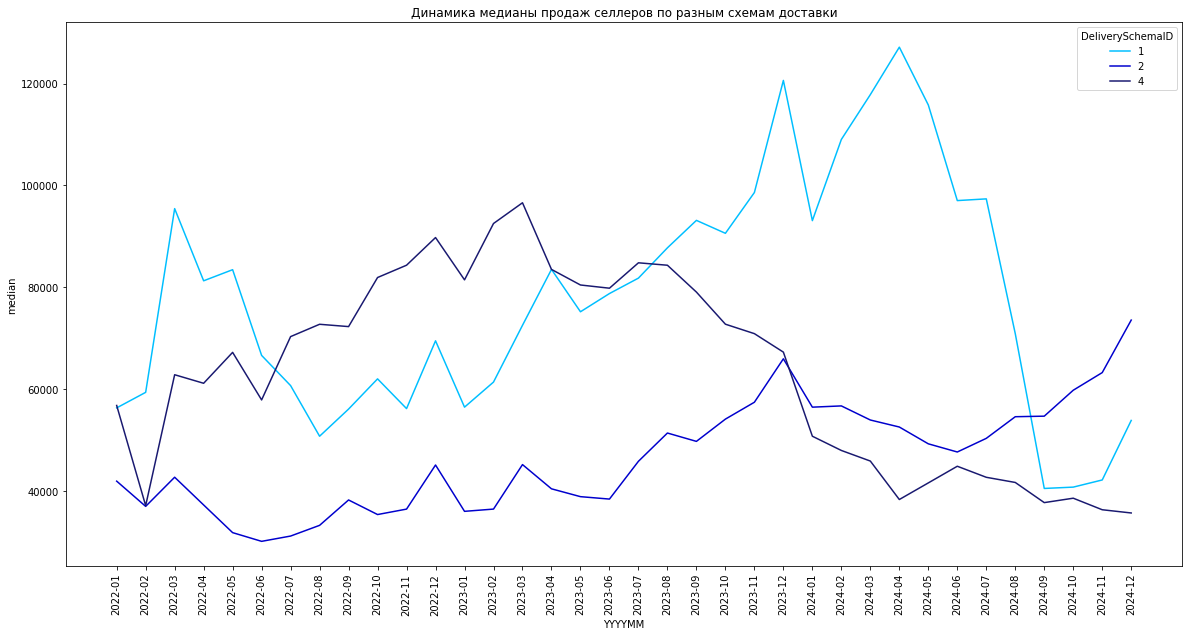

In [133]:
# медианный оборот по DeliverySchema
data_gyp1 = data \
    .groupby(['YYYYMM','DeliverySchemaID', 'MerchantID'], as_index = False) \
    .agg({'sales_rub': 'sum'}) \
    .groupby(['YYYYMM','DeliverySchemaID'], as_index = False) \
    .agg(median=('sales_rub', 'median'))

data_gyp1['YYYYMM'] = data_gyp1['YYYYMM'].astype(str)  
plt.figure(figsize=(20, 10))
plt.xticks(rotation = 90);
sns.lineplot(x = 'YYYYMM', y = 'median', hue = 'DeliverySchemaID', data = data_gyp1, palette = ['#00bfff', '#0000cd', '#191970'])
plt.title('Динамика медианы продаж селлеров по разным схемам доставки')

### Работа со столбцом Brand

Как уже упоминалось ранее в рамках работы с пропусками, самым большим брендом является столбец с именем 'Нет бренда'.

In [134]:
pivot_table = data \
    .groupby(['Year','Brand'], as_index = False) \
    .agg({'sales_rub': 'sum'}) \
    .pivot_table(columns = 'Year', values = 'sales_rub', index = 'Brand')

# Заменяем NaN на 0
pivot_table = pivot_table.fillna(0)
pivot_table['Total'] = pivot_table[2022] + pivot_table[2023] + pivot_table[2024]

# Сортируем сводную таблицу по убыванию
pivot_table.sort_values('Total', ascending=False).head(5) \
    .style.set_table_attributes('style="font-size: 14px; border-collapse: collapse;"') \
    .set_caption("Продажи топ-5 брендов") \
    .set_table_styles(
                    [
                      {'selector': 'th', 'props': [('background-color', '#f1f2f9'), ('color', 'black')]},
                      {'selector': 'td', 'props': [('color', 'black')]},  # Цвет текста для ячеек
                      {'selector': 'tr:nth-child(even) td', 'props': [('background-color', '#f1f2f9')]},  # Четные строки
                      {'selector': 'tr:nth-child(odd) td', 'props': [('background-color', 'white')]}]  # Нечетные строки
    ).format("{:,.0f}")

- Можно заметить интересную тенденцию на сокращение доли топ-100 брендов в годичном обороте. Данный факт можно рассматривать с различных сторон. Это можно связать с уходом крупных брендов с российского рынка в 2022 году. К сожалению, данных недостаточно, чтобы сформировать полноценные выводы по поводу данной тендеции.

In [135]:
sum_2022 = pivot_table[2022].sum()
sum_2023 = pivot_table[2023].sum()
sum_2024 = pivot_table[2024].sum()

top_100_2022 = pivot_table[2022].sort_values(ascending = False).head(100).sum()
top_100_2023 = pivot_table[2023].sort_values(ascending = False).head(100).sum()
top_100_2024 = pivot_table[2024].sort_values(ascending = False).head(100).sum()

print('Доля топ-100 брендов в 2022 году составляет:', round(top_100_2022 / sum_2022 * 100,2), '%')
print('Доля топ-100 брендов в 2023 году составляет:', round(top_100_2023 / sum_2023 * 100,2), '%')
print('Доля топ-100 брендов в 2024 году составляет:', round(top_100_2024 / sum_2024 * 100,2), '%')

Доля топ-100 брендов в 2022 году составляет: 63.58 %
Доля топ-100 брендов в 2023 году составляет: 55.74 %
Доля топ-100 брендов в 2024 году составляет: 54.08 %


### Работа со столбцом is_promo, исследование сезонности

Может показаться, что в данные закралась ошибка, что данные не доехали или произошло что-то другое. Почему в 2022 и 2023 годах почти совсем не было товаров в акции? Всё дело в политике маркетплейса относительно акционных товаров. Если до 2024 года акция как таковая существовала только в рамках высокого сезона (ноябрь-декабрь), то с начала 2024 акции стали проводиться ежемесячно.

Это ОЧЕНЬ важный момент. Мы собираемся прогнозировать продажи, будем использовать предыдущие периоды, будем использовать сезонность, а тут выясняется, что промо-период с 2024 года проходит каждый месяц, вместо 2 как раньше.

Интересно будет хотя бы верхнеуронево посмотреть на % прироста продаж по месяцам. Насколько сильно теперь растут продажи в высокие месяцы (ноябрь-декабрь)?

In [136]:
pivot_table = data.pivot_table(values = 'sales_rub', index = 'YYYYMM', columns = 'is_promo', aggfunc = 'sum', margins = True)
pivot_table \
    .style.set_table_attributes('style="font-size: 14px; border-collapse: collapse;"') \
    .set_caption("Доля промо продаж") \
    .set_table_styles(
                    [
                      {'selector': 'th', 'props': [('background-color', '#f1f2f9'), ('color', 'black')]},
                      {'selector': 'td', 'props': [('color', 'black')]},  # Цвет текста для ячеек
                      {'selector': 'tr:nth-child(even) td', 'props': [('background-color', '#f1f2f9')]},  # Четные строки
                      {'selector': 'tr:nth-child(odd) td', 'props': [('background-color', 'white')]}]  # Нечетные строки
    ).format("{:,.0f}")

Данная сводная таблица даёт нам более полное представление о сезонности в наших данных.

Начнём с первого вопроса - как изменение относительно политики промо-периода повлияло на продажи?
Ноябрь на всем рассматриваемом промежутке растёт примерно на 17-19% к октябрю. Кажется, что падение не сильно заметно. Продажи не распределились на весь год.
В декабре 2023 продажи выросли на 16%, а в январе 2024 упали на 29%. Похожее падение продаж было в январе 2023 года, но там была другая промо-политика. 
Казалось бы, что ежемесячное промо должно было повысить продажи января и сгладить сезонное падение, но этого не случилось.

In [137]:
pivot_table['MoM Growth'] = (pivot_table['All'] / pivot_table['All'].shift(1) - 1) * 100

pivot_table.index = pivot_table.index.astype(str)
pivot_table['Year'] = pivot_table.index.str[:4]
pivot_table['Month'] = pivot_table.index.str[5:7]

pivot_table = pivot_table.drop(index='All')

pivot_table.pivot_table(values='MoM Growth', index='Month', columns='Year').style.set_table_attributes('style="font-size: 14px; border-collapse: collapse;"') \
                                        .set_caption("Таблица MoM приростов") \
                                        .set_table_styles(
                                            [
                                                {'selector': 'th', 'props': [('background-color', '#f1f2f9'), ('color', 'black')]},
                                                {'selector': 'td', 'props': [('color', 'black')]},  # Цвет текста для ячеек
                                                {'selector': 'tr:nth-child(even) td', 'props': [('background-color', '#f1f2f9')]},  # Четные строки
                                                {'selector': 'tr:nth-child(odd) td', 'props': [('background-color', 'white')]}]  # Нечетные строки
                                        ).format("{:,.2f}")

Постараемся представить эти же данные немного в другом виде. На графике ниже уже можно заметить определенные закономерности. Во все годы март по продажам выше февраля Потом идёт некоторая стагнация (иногда снижение) на протяжении апреля, мая и июня. В июле и августе во все годы был рост. В сентябре скорее можно ожидать падение продаж. Октябрь, ноябрь и декабрь - демонстрируют опять рост. 

Безусловно, подобный анализ является очень поверхностным, но он достаточно полезен при первом знакомстве с рассматриваемыми данными.

Text(0.5, 1.0, 'Продажи по месяцам')

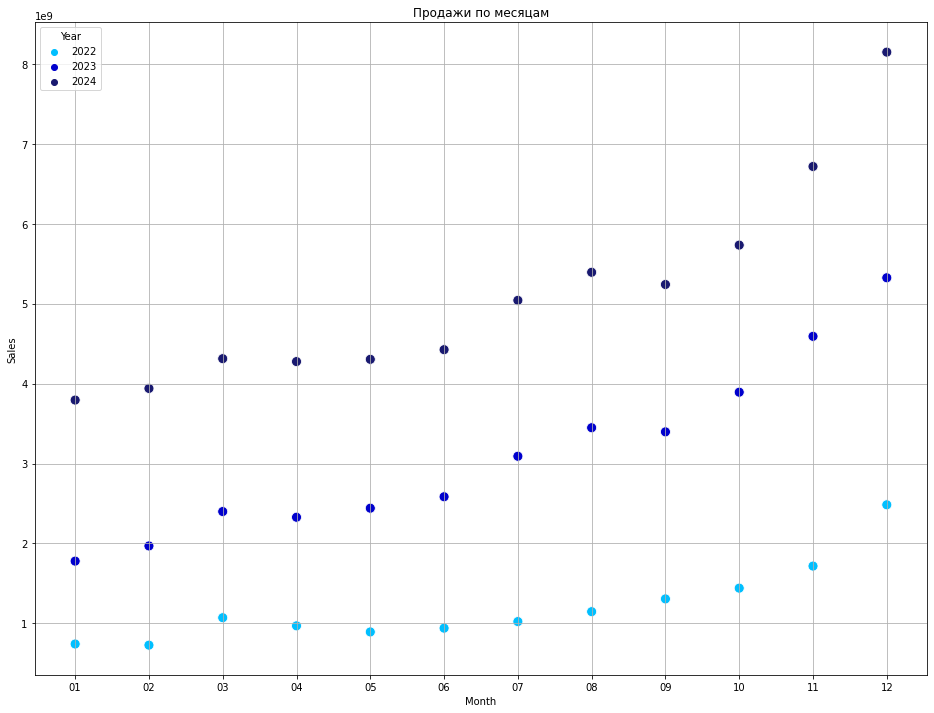

In [138]:
plt.figure(figsize=(16, 12))


sns.scatterplot(x = 'Month', y = 'All', hue = 'Year', data = pivot_table.reset_index()[['Year','Month', 'All']], s = 100, palette = ['#00bfff', '#0000cd', '#191970'])
plt.grid()
plt.ylabel('Sales')
plt.title('Продажи по месяцам')

### Исследование распределения продаж по ItemID

- проанализируем, как распределены продажи SKU за рассматриваемый промежуток времени. Могу предположить, что мы увидим что-то схожее с F-распределением. Большое кол-во товаров с низкими продажами, и относительно маленькое кол-во товаров, которые продаются в по-настоящему больших количествах.
- Предположение подтвердилось. Огромное количество товаро имеет относительно низкие продажи, и только единицы товаров продаются на миллионы рублей.

Text(0.5, 1.0, 'Распределение продаж товаров')

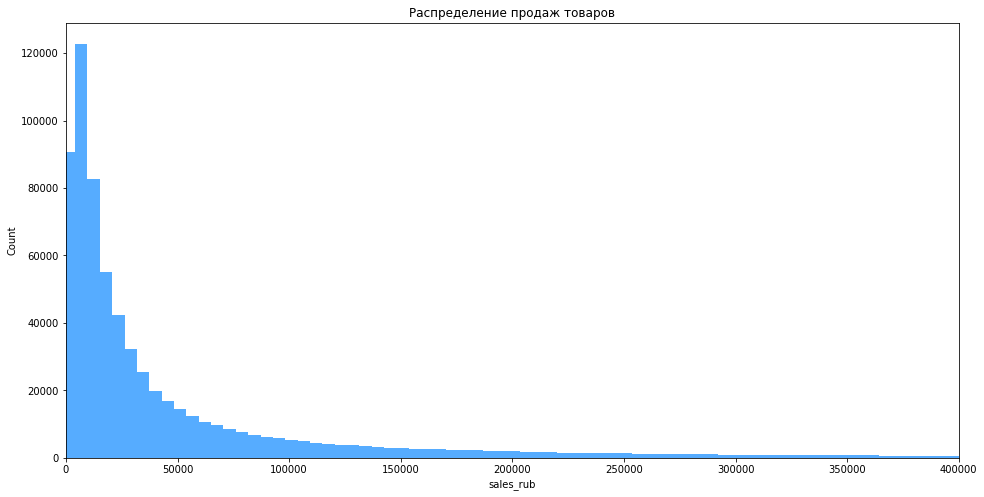

In [139]:
item_sales_distr = data \
                        .groupby(['ItemID'], as_index = False) \
                        .agg({'sales_rub': 'sum'})

plt.figure(figsize=(16, 8))
sns.histplot(item_sales_distr.sales_rub, bins=35000, kde=False, color = '#1e90ff')
plt.xlim(0, 400000)
plt.title("Распределение продаж товаров")

### Работа со столбцом MerchantID

Интересно, что первая пятерка брендов по обороту и первая пятерка магазинов (у которых выделен бренд) очень похожи. Это может говорить о некоторой консолидированности рынка. Один бренд имеет один основной кабинет для реализации товара. Например, бренд AMI MEBEL реализуют магазины под номером 333094 (2.7 млрд руб за три года) и 113545 (0.5 млрд руб за три года).

Интересно посмотреть, насколько консолидирован рынок в рамках продавца. Какую долю имеют первые 100 селлеров по обороту от всей мебельной категории?

Также можно сделать предположение, что бренд 'Нет бренда' пользуется популярностью у более мелких селллеров.

In [140]:
pivot_table = data \
    .groupby(['Year','MerchantID', 'Brand'], as_index = False) \
    .agg({'sales_rub': 'sum'}) \
    .pivot_table(columns = 'Year', values = 'sales_rub', index = ['MerchantID', 'Brand'])

# Заменяем NaN на 0
pivot_table = pivot_table.fillna(0)
pivot_table['Total'] = pivot_table[2022] + pivot_table[2023] + pivot_table[2024]

# Сортируем сводную таблицу по убыванию
pivot_table.sort_values('Total', ascending=False).head(20) \
    .style.set_table_attributes('style="font-size: 14px; border-collapse: collapse;"') \
    .set_caption("Продажи топ-20 селлеров") \
    .set_table_styles(
                    [
                      {'selector': 'th', 'props': [('background-color', '#f1f2f9'), ('color', 'black')]},
                      {'selector': 'td', 'props': [('color', 'black')]},  # Цвет текста для ячеек
                      {'selector': 'tr:nth-child(even) td', 'props': [('background-color', '#f1f2f9')]},  # Четные строки
                      {'selector': 'tr:nth-child(odd) td', 'props': [('background-color', 'white')]}]  # Нечетные строки
    ).format("{:,.0f}")

- На уровне магазинов мы видим схожую тенденцию на уменьшение доли самых больших селлеров. Можно предположить, что за прошедшие годы кол-во селлеров кратно увеличилось, что привело к повышению конкуренции, уменьшению продаж крупных селлеров.

В связи с этим интересно будет посмотреть на график, который бы продемонстрировал кол-во активных селлеров по месяцам на рассматриваемом промежутке времени.

In [141]:
pivot_table = data \
    .groupby(['Year','MerchantID'], as_index = False) \
    .agg({'sales_rub': 'sum'}) \
    .pivot_table(columns = 'Year', values = 'sales_rub', index = ['MerchantID'])

# Заменяем NaN на 0
pivot_table = pivot_table.fillna(0)
pivot_table['Total'] = pivot_table[2022] + pivot_table[2023] + pivot_table[2024]

sum_2022 = pivot_table[2022].sum()
sum_2023 = pivot_table[2023].sum()
sum_2024 = pivot_table[2024].sum()

top_100_2022 = pivot_table[2022].sort_values(ascending = False).head(100).sum()
top_100_2023 = pivot_table[2023].sort_values(ascending = False).head(100).sum()
top_100_2024 = pivot_table[2024].sort_values(ascending = False).head(100).sum()

print('Доля топ-100 селлеров в 2022 году составляет:', round(top_100_2022 / sum_2022 * 100,2), '%')
print('Доля топ-100 селлеров в 2023 году составляет:', round(top_100_2023 / sum_2023 * 100,2), '%')
print('Доля топ-100 селлеров в 2024 году составляет:', round(top_100_2024 / sum_2024 * 100,2), '%')

Доля топ-100 селлеров в 2022 году составляет: 53.0 %
Доля топ-100 селлеров в 2023 году составляет: 43.24 %
Доля топ-100 селлеров в 2024 году составляет: 40.9 %


Можно заметить, что на рассматриваемом промежутке времени почти всё время наблюдался рост количества активных селлеров. Первые признаки стагнации заметны только с апреля по август 2024, но ближе к осени количество селлеров опять начало расти.

Также интересно посмотреть не просто на селлеров, у которых был какой-либо оборот в определенный месяц, а хотя бы как-то определить нижнюю границу этого оборота. Допустим, проанализировать кол-во селлеров по месяцам с оборотом в 10 т.р. и выше.

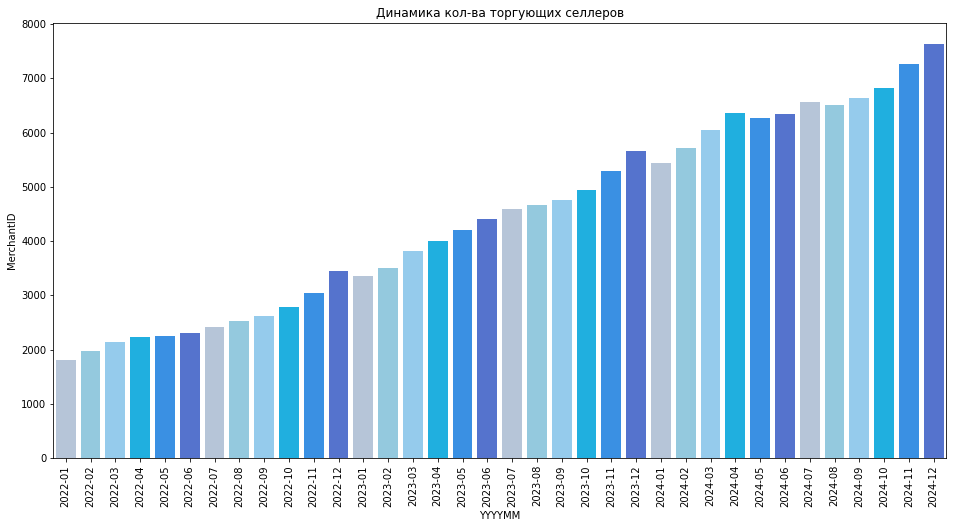

In [142]:
unique_merchants_per_month = data \
                            .groupby(['YYYYMM'], as_index = False)['MerchantID'] \
                            .nunique()

plt.figure(figsize=(16, 8))
palette = ['#B0C4DE', '#87ceeb', '#87cefa', '#00bfff', '#1E90FF', '#4169e1']
sns.barplot(x = 'YYYYMM', y = 'MerchantID', data = unique_merchants_per_month, palette = palette)
plt.xticks(rotation = 90);
plt.title('Динамика кол-ва торгующих селлеров');

- Я попробовал порог оборота 10 тысяч рублей, 100 тысяч рублей, 1 млн рублей - во всех случаях заметен рост кол-ва селлеров на рассматриваемом промежутке времени. Безусловно, когда ставим фильтр на оборот в 1 млн рублей, то промежуточные результаты меняются, но общая тенденция сохраняется - количество селлеров растёт.

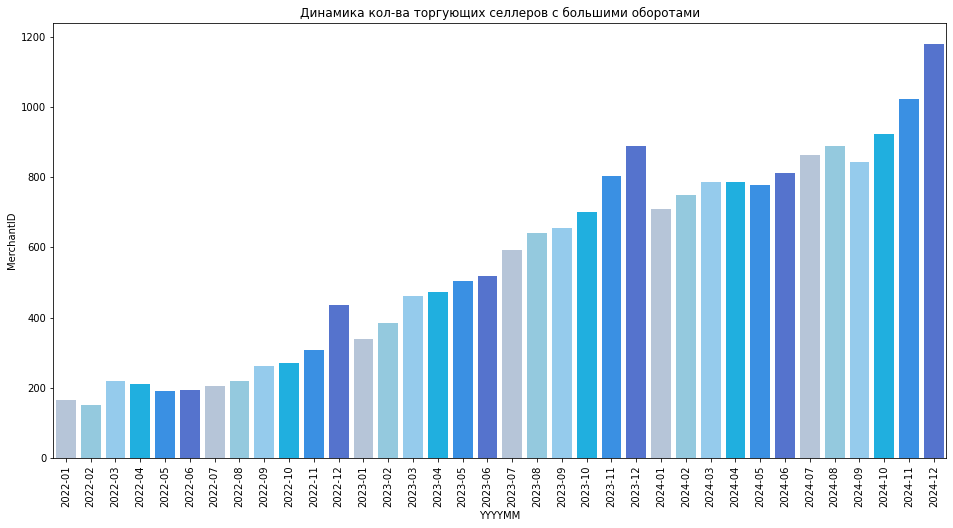

In [143]:
unique_merchants_per_month = data \
    .groupby(['YYYYMM', 'MerchantID'], as_index = False) \
    .agg({'sales_rub': 'sum'}) \
    .query("sales_rub > 1000000")[['YYYYMM', 'MerchantID']] \
    .groupby(['YYYYMM'], as_index = False)['MerchantID'] \
    .nunique()

plt.figure(figsize=(16, 8))
sns.barplot(x = 'YYYYMM', y = 'MerchantID', data = unique_merchants_per_month, palette = palette)
plt.xticks(rotation = 90);
plt.title('Динамика кол-ва торгующих селлеров с большими оборотами');


- Интересно также рассмотреть не только кол-во селлеров, но и их медианную выручку.
- А вот это уже интересно. Медиана продаж селлеров за рассматриваемый промежуток времени - стагнирует. Число селлеров увеличилось почти в 5 раз, а вот медиана месячных продаж - существенно не изменилась. 50% селлеров всё также продолжают получать меньше 50 тыс.руб. в месяц.

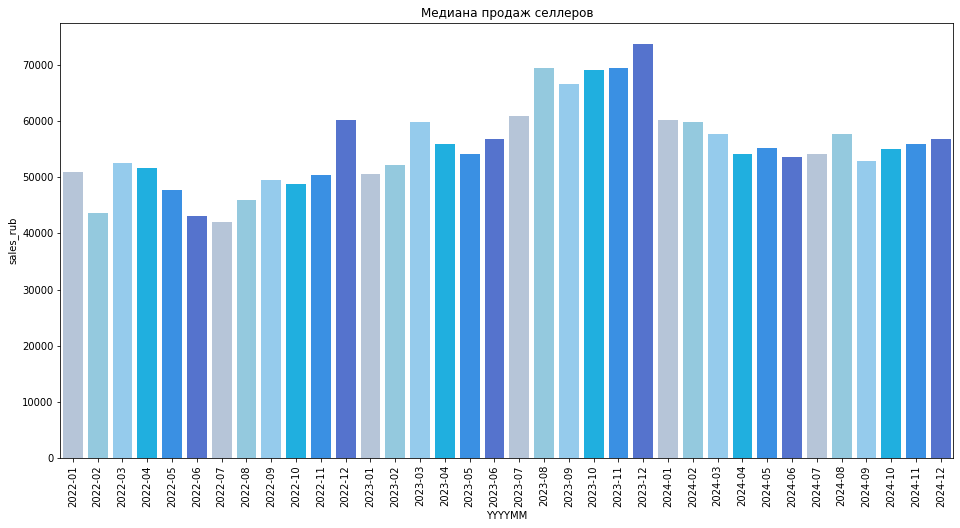

In [144]:
median_revenue = data \
    .groupby(['YYYYMM', 'MerchantID'], as_index = False) \
    .agg({'sales_rub': 'sum'}) \
    .groupby(['YYYYMM'], as_index = False) \
    .agg({'sales_rub': 'median'})

plt.figure(figsize=(16, 8))
sns.barplot(x = 'YYYYMM', y = 'sales_rub', data = median_revenue, palette = palette)
plt.xticks(rotation = 90);
plt.title('Медиана продаж селлеров');

- Проанализируем распределение продаж по селлерам в нашем датафрейме
- Как можно увидеть, распределение продаж по селлерам также похоже на F-распределение. Очень большое кол-во селлеров имеет низкие продажи, и очень малое кол-во селлеров имеют высокие продажи.

Text(0.5, 1.0, 'Распределение продаж по селлерам')

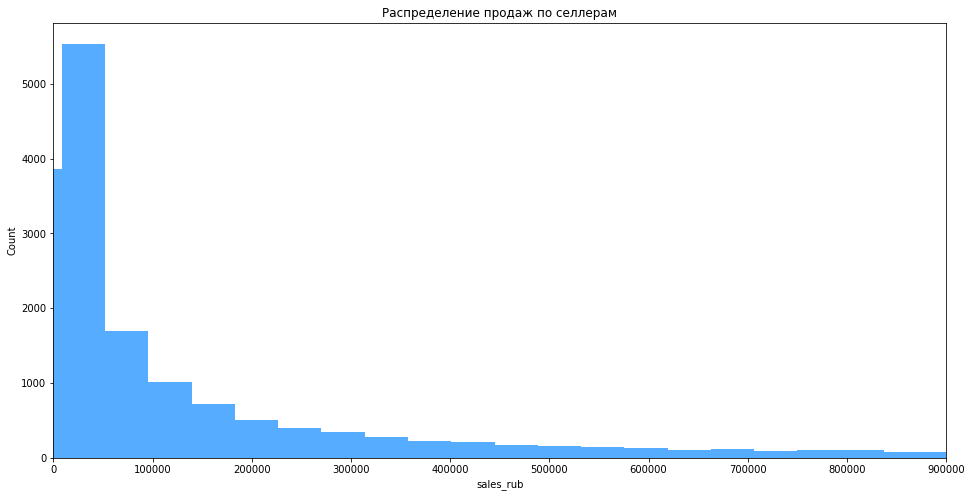

In [145]:
merchant_sales_distr = data \
                        .groupby(['MerchantID'], as_index = False) \
                        .agg({'sales_rub': 'sum'})

plt.figure(figsize=(16, 8))
sns.histplot(merchant_sales_distr.sales_rub, kde=False, color = '#1e90ff')
plt.xlim(0, 900000)
plt.title("Распределение продаж по селлерам")

### Работа со столбцом IsKGT

- До августа 2024 года доля НеКГТ товаров превышала долю КГТ товаров в продажах. 
- Наращивание доли КГТ товаров началось примерно в 1-ом квартале 2024 года, и уже к маю объёмы продаж КГТ товаров обогнали продажи НеКГТ товаров.

Интересно проанализировать - изменилась методолгия признания товара КГТ? Или просто КГТ товары начали больше продавать в 2024 году?

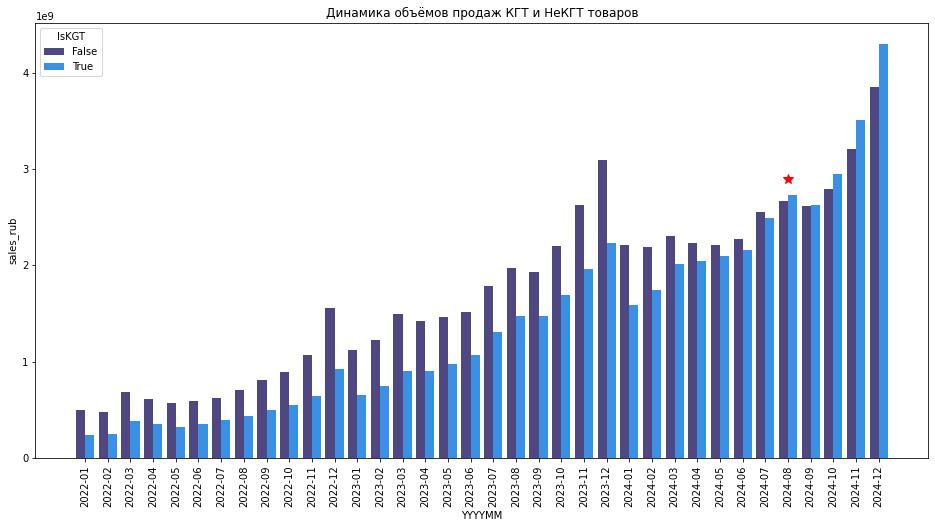

In [146]:
#pivot_table = data.pivot_table(values = 'sales_rub', index = 'YYYYMM', columns = 'IsKGT', aggfunc = 'sum', margins = True)

kgt_data = data \
    .groupby(['YYYYMM', 'IsKGT'], as_index = False) \
    .agg({'sales_rub': 'sum'})

plt.figure(figsize=(16, 8))
ax = sns.barplot(data = kgt_data, y = 'sales_rub', x = 'YYYYMM', hue = 'IsKGT', palette = ['#483d8b', '#1e90ff'])
plt.xticks(rotation = 90);
plt.title('Динамика объёмов продаж КГТ и НеКГТ товаров');
ax.plot(31, 2900000000, "*", markersize=10, color="r")

- Вот почему важно по-разному визуализировать данные. Ещё на прошлом шаге мы думали, что тенденция зародилась в начале 2024 года, а теперь мы видим, что так или иначе на всём рассматриваемом промежутке времени доля оборота КГТ товаров с разной скоростью росла
- Также создается ощущение, что в динамике доли наблюдается некоторая сезонность

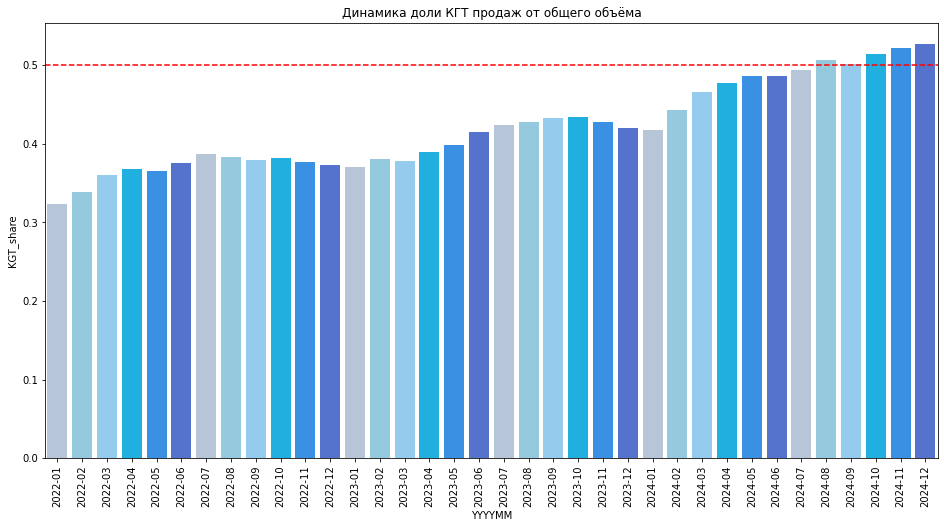

In [147]:
new_kgt = kgt_data.pivot_table(values = 'sales_rub', columns = 'IsKGT', index = 'YYYYMM')

new_kgt['All'] = new_kgt[True] + new_kgt[False]
new_kgt['KGT_share'] = new_kgt[True] / new_kgt['All']

plt.figure(figsize=(16, 8))
sns.barplot(data = new_kgt.reset_index(), y = 'KGT_share', x = 'YYYYMM', palette = palette)
plt.xticks(rotation = 90);
plt.title('Динамика доли КГТ продаж от общего объёма');
plt.axhline(y=0.5, color='red', linestyle='--', label='Уровень 0.5')

- И все-таки я бы осмелился сделать предположение, что методология признания товара КГТ модифицировалась и менялась на рассматриваемом промежутке времени.
- Сначала мы увидели, что доля КГТ товаров растёт, теперь мы видим, что для НеКГТ товаров показатель литр на штуку падает.
- Моя гипотеза состоит в том, что метрика, которая определяет, является ли товар КГТ - со временем снижалась, т.е. товар, который раньше не являлся КГТ по объёму, со временем стал КГТ.
- Данную гипотезу можно раскопать. Попробуем найти товары, которые были КГТ и НеКГТ в разные периоды времени.

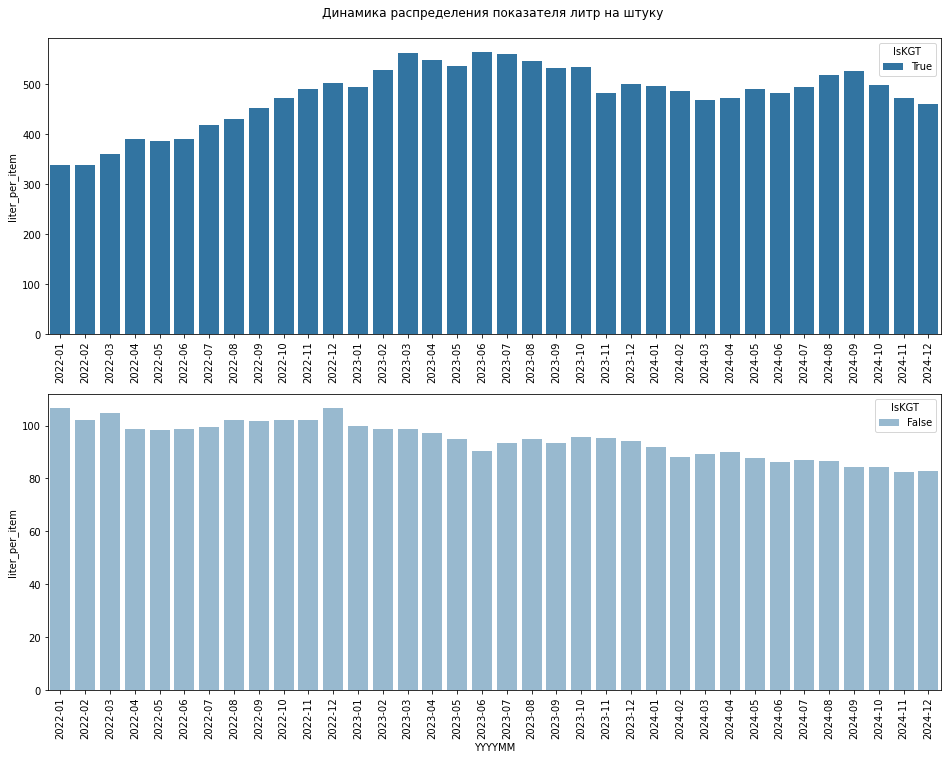

In [148]:
liters_data = data \
    .groupby(['YYYYMM', 'IsKGT'], as_index = False) \
    .agg({'qty': 'sum', 'liters': 'sum'})

liters_data['liter_per_item'] = liters_data['liters'] / liters_data['qty']

plt.figure(figsize=(16, 12))

plt.subplot(2,1,1)
sns.barplot(data = liters_data.query("IsKGT == True"), y = 'liter_per_item', x = 'YYYYMM', hue = 'IsKGT')
plt.xticks(rotation = 90);
plt.xlabel("")
plt.title('Динамика распределения показателя литр на штуку \n')

plt.subplot(2,1,2)
sns.barplot(data = liters_data.query("IsKGT == False"), y = 'liter_per_item', x = 'YYYYMM', hue = 'IsKGT', alpha = 0.5)
plt.xticks(rotation = 90);

### Работа со столбцом uniq_session_view и uniq_client_view

- как уже упоминалось ранее, данные по просмотрам у нас есть, начиная с начала 2023 года
- просмотры имеют восходяющую тенденцию, также кажется, что динамика продаж имеет схожую тенденцию. Это предположение нам предстоит проверить в следующих разделах
- чисто визуально кажется, что разные типы данных о просмотрах, прям ну очень сильно связаны, и в дальнейшем анализе можно будет использовать что-то одно

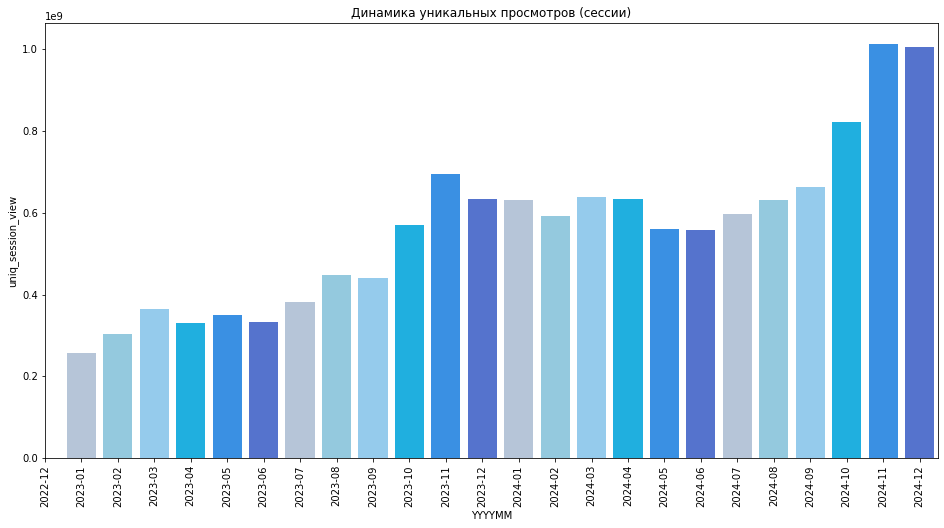

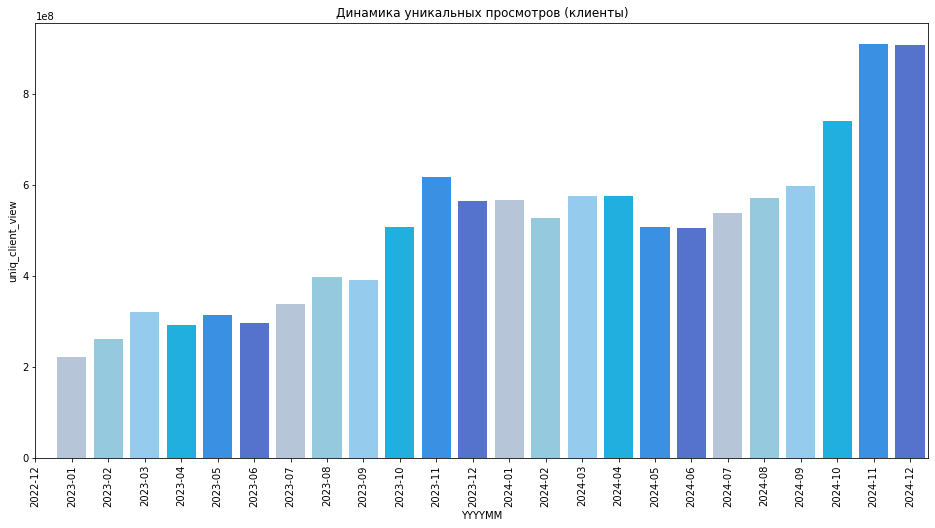

In [149]:
uniq_session_view_data = data \
    .groupby(['YYYYMM'], as_index = False) \
    .agg({'uniq_session_view': 'sum'})

plt.figure(figsize=(16, 8))
sns.barplot(data = uniq_session_view_data, y = 'uniq_session_view', x = 'YYYYMM', palette = palette)
plt.xticks(rotation = 90);
plt.xlim(11,)
plt.title('Динамика уникальных просмотров (сессии)');


uniq_client_view_data = data \
    .groupby(['YYYYMM'], as_index = False) \
    .agg({'uniq_client_view': 'sum'})

plt.figure(figsize=(16, 8))
sns.barplot(data = uniq_client_view_data, y = 'uniq_client_view', x = 'YYYYMM', palette = palette)
plt.xticks(rotation = 90);
plt.xlim(11,)
plt.title('Динамика уникальных просмотров (клиенты)');

Проанализируем зависимость разных видов просмотров
- Идеальная положительная линейная связь, все наблюдения выстроились вдоль одной кривой
- Предлагаю остановиться на 'uniq_session_view'

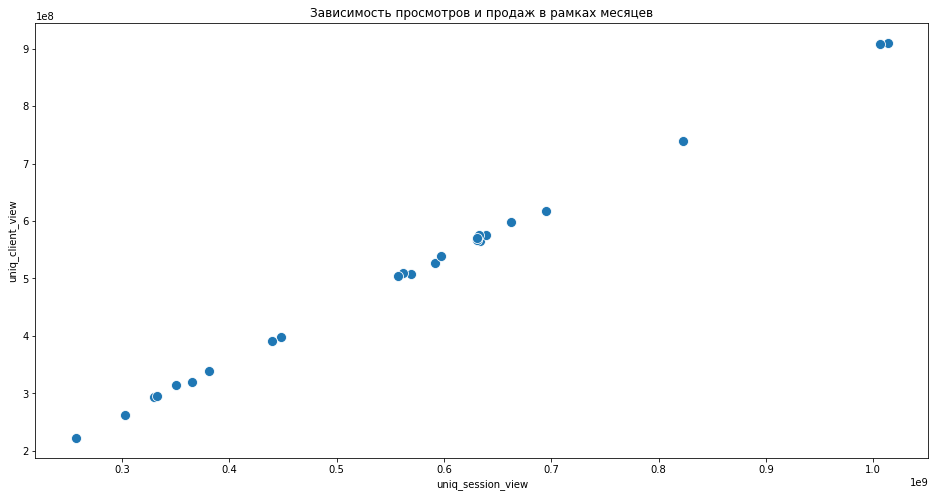

In [167]:
dependency_views_types = data \
    .groupby(['YYYYMM'], as_index = False) \
    .agg({'uniq_session_view': 'sum', 'uniq_client_view': 'sum'}) \
    .query('YYYYMM >= "2023-01"')

plt.figure(figsize=(16, 8))
sns.scatterplot(x = 'uniq_session_view', y = 'uniq_client_view', data = dependency_views_types, s = 100, palette = palette)
plt.title('Зависимость просмотров и продаж в рамках месяцев');

- исследование зависимости просмотров и продаж говорит нам о потенциальном наличии линейной зависимости между продажами и просмотрами, что звучит достаточно логично
- интересно заметить другое - эта зависимость существенно отличается для 2023 и 2024 года. 2024 год формирует некоторое "облако", в то время как 2023 год демонстрирует более линейную связь
- тем не менее 2024 год всё ещё продолжает демонстрировать линейную связь между продажами и просмотрами

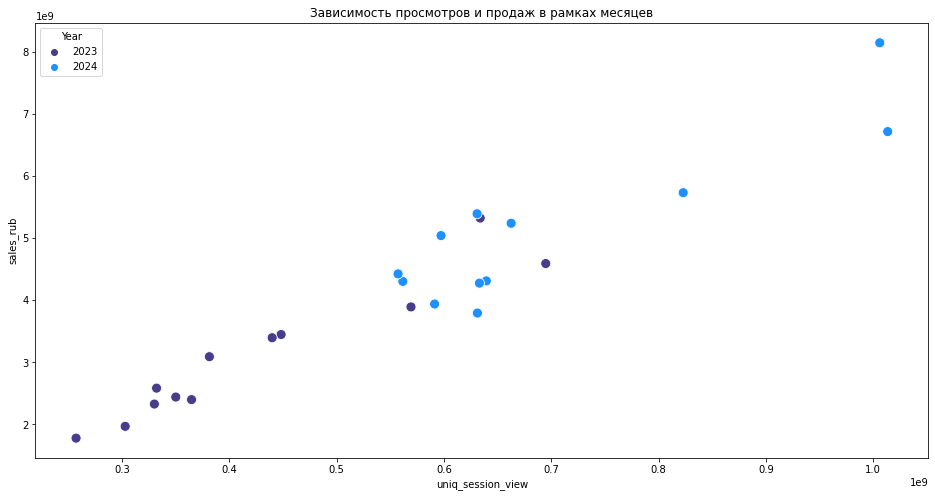

In [151]:
dependency_session_views_sales = data \
    .groupby(['YYYYMM', 'Year'], as_index = False) \
    .agg({'uniq_session_view': 'sum', 'sales_rub': 'sum'}) \
    .query('YYYYMM >= "2023-01"')

plt.figure(figsize=(16, 8))
sns.scatterplot(x = 'uniq_session_view', y = 'sales_rub', data = dependency_session_views_sales, s = 100, hue = 'Year', palette = ['#483d8b', '#1e90ff'])
plt.title('Зависимость просмотров и продаж в рамках месяцев');

Попробуем проанализировать распределение просмотров среди Item_id за всё время. Ожидаю увидеть F-распределение, в пользу данного утверждения свидетельствуют два аспекта - положительная линейная связь между просмотрами и продажами (продажи по SKU распределены по F-распределению), плюс это просто логично. Большинство товаров будет иметь мало просмотров, и лишь единицы будут выделяться большим кол-ом просмотров.

- предположение оказалось верным

Text(0.5, 1.0, 'Распределение просмотров товаров')

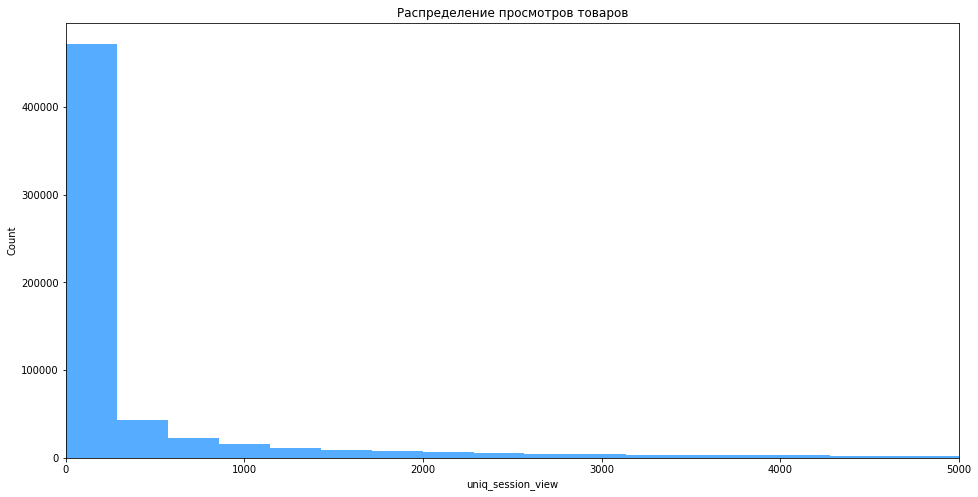

In [152]:
item_views_distr = data \
                        .groupby(['ItemID'], as_index = False) \
                        .agg({'uniq_session_view': 'sum'})

plt.figure(figsize=(16, 8))
sns.histplot(item_views_distr.uniq_session_view, bins=150000, kde=False, color = '#1e90ff')
plt.xlim(0, 5000)
plt.title("Распределение просмотров товаров")

### Анализ принятых заказов по дням недели

- как можно увидеть, различия между принятыми заказами в разные дни недели все-таки существуют
- в субботу медианные продажи самые низкие, в понедельник медианные продажи самые высокие. Такая тенденция может быть связана с тем, что люди переносят покупки товаров с выходных дней на понедельник, но это всего лишь предположение. 
- на следующих этапах работы интересно будет протестировать равенство средних продаж в разные дни недели. Безусловно, перед этим нужно будет очистить продажи от выбросов (дни недели, на которые попали распродажи - черная пятница и тд)

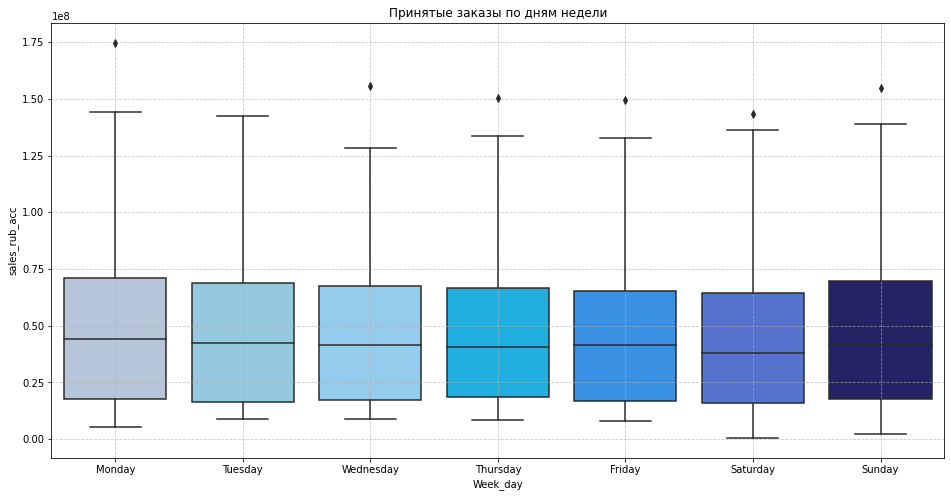

In [153]:
week_data = data \
                .query(" sales_rub_acc > 0 ") \
                .groupby(['Date', 'Week_day'], as_index = False) \
                .agg({'sales_rub_acc': 'sum'})

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(16, 8))

palettte = ['#B0C4DE', '#87ceeb', '#87cefa', '#00bfff', '#1E90FF', '#4169e1', '#191970']
sns.boxplot(x='Week_day', y='sales_rub_acc', data=week_data, order=day_order, palette = palettte)
plt.title('Принятые заказы по дням недели');
plt.grid(linestyle='--', alpha=0.7)

### Исследование столбца 'this_day_reviews_cnt'

- как можно увидеть, заметна достаточно сильная корреляция между продажами и кол-ом отзывов. Это логично, т.к. чем больше продаж, тем больше отзывов. 

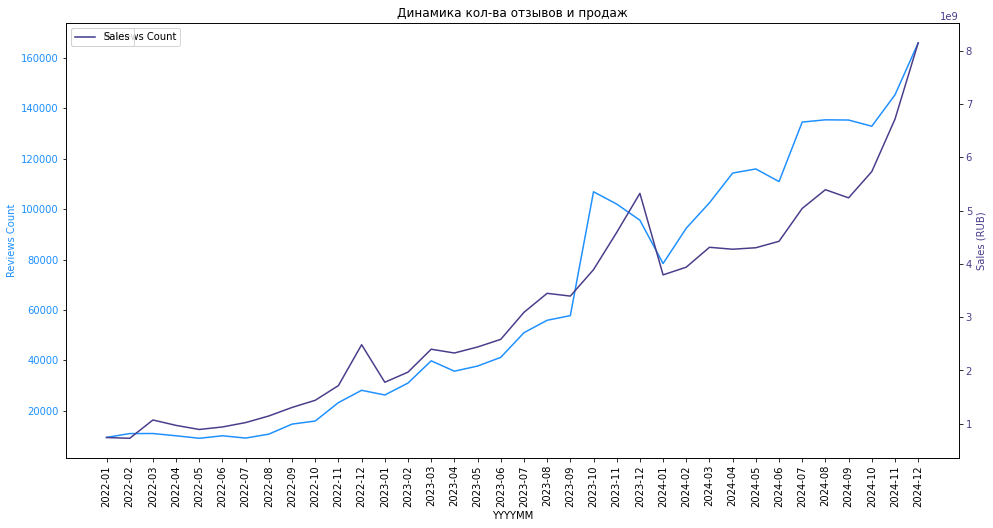

In [154]:
grouped_data = data \
                .groupby(['YYYYMM'], as_index = False) \
                .agg({'this_day_reviews_cnt': 'sum', 'sales_rub': 'sum'})

grouped_data['YYYYMM'] = grouped_data['YYYYMM'].astype(str)

# Создание фигуры и осей
fig, ax1 = plt.subplots(figsize=(16, 8))

# Построение первого графика
sns.lineplot(x='YYYYMM', y='this_day_reviews_cnt', data=grouped_data, ax=ax1, color='#1e90ff', label='Reviews Count')
ax1.set_ylabel('Reviews Count', color='#1e90ff')
ax1.tick_params(axis='y', labelcolor='#1e90ff')
plt.xticks(rotation = 90);

# Создание второй оси Y
ax2 = ax1.twinx()

# Построение второго графика
sns.lineplot(x='YYYYMM', y='sales_rub', data=grouped_data, ax=ax2, color='#483d8b', label='Sales')
ax2.set_ylabel('Sales (RUB)', color='#483d8b')
ax2.tick_params(axis='y', labelcolor='#483d8b')
plt.xticks(rotation = 90);

# Показать график
plt.title('Динамика кол-ва отзывов и продаж')
plt.show()


Проверим связь между продажами и отзывами с помощью диаграммы рассеяния 

- видим положительную линейную зависимость между кол-ом отзывов в рамках месяца и продажами. График очень похож на то, что мы видели в случае анализа кол-ва просмотров и кол-ва продаж.

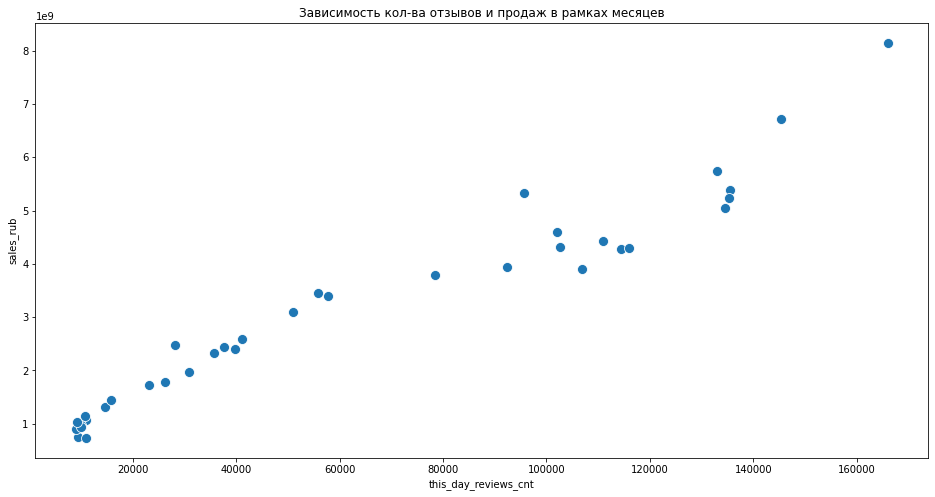

In [163]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x = 'this_day_reviews_cnt', y = 'sales_rub', data = grouped_data, s = 100, palette = '#483d8b')
plt.title('Зависимость кол-ва отзывов и продаж в рамках месяцев');

### Исследование столбца 'this_day_avg_reviews_rating'

Попытаемся исследовать связь между продажами товара и его средним рейтингом. Кажется, что товары с отзывами в 4* и выше должны продавать в больших количествах, а товары с низкими отзывами не должны продаваться

- товары с низким рейтингом не имеют продаж
- существует положительная зависимость между рейтингом товара и его продажами
- зависимость между рейтингом товара и его продажами нелинейная
- почти все товары с высокими продажами имеют рейтинг от 4.5 до 5*
- подавляющее большинство товаров имеют рейтинг от 3.5 до 5*

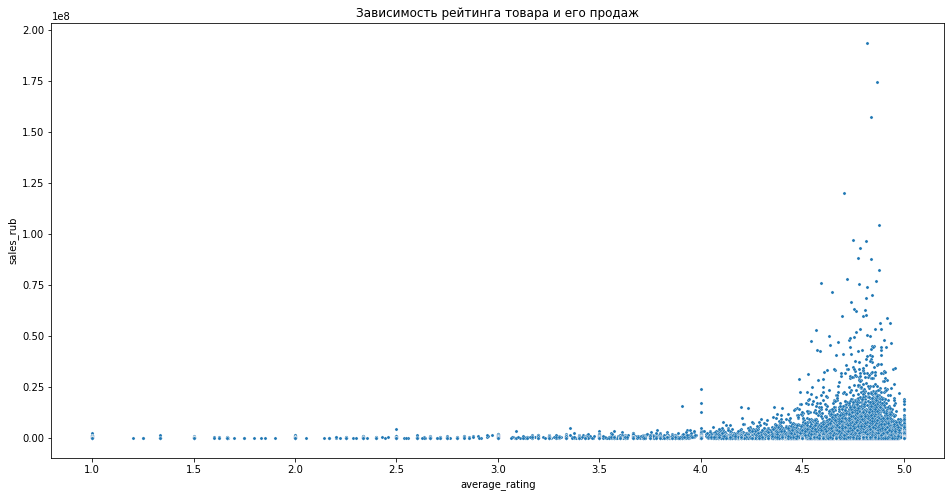

In [156]:
rating = data \
        .groupby(['ItemID'], as_index = False) \
        .agg({'sales_rub': 'sum', 'this_day_reviews_cnt': 'sum', 'weighted_rating': 'sum'})

rating['average_rating'] = rating['weighted_rating'] / rating['this_day_reviews_cnt']

rating = rating[rating['average_rating'].notnull()] # исключаем товары с NaN average_rating

plt.figure(figsize=(16, 8))
sns.scatterplot(x = 'average_rating', y = 'sales_rub', data = rating, s = 10, palette = palette)
plt.title('Зависимость рейтинга товара и его продаж');

- данная гистрограмма свидетельствует о том, что большая часть товаров находится на отрезке от 4.5 до 5*
- интересно заметить, что товаров с рейтингом 1 куда больше, чем товаров с 2*. Скорее это связано с тем, что если пользователю пришёл товар ненадлежащего качества, то он почти всегда поставит ему минимальную оценку - 1*, а 2* - это ни туда, ни сюда.

Text(0.5, 1.0, 'Распределение рейтингов всех товаров')

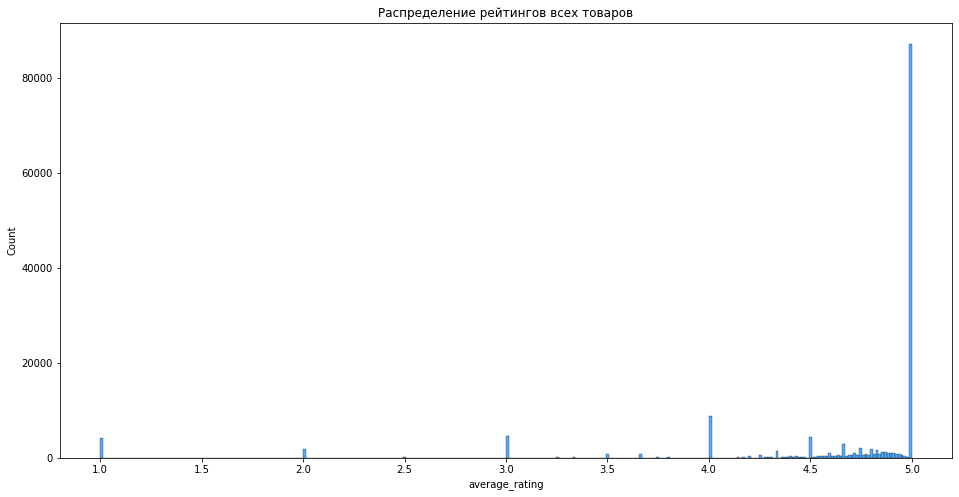

In [157]:
plt.figure(figsize=(16, 8))
sns.histplot(rating.average_rating,  kde=False, color = '#1e90ff')
# plt.xlim(0, 5000)
plt.title("Распределение рейтингов всех товаров")

Text(0.5, 1.0, 'Распределение рейтингов лучших товаров')

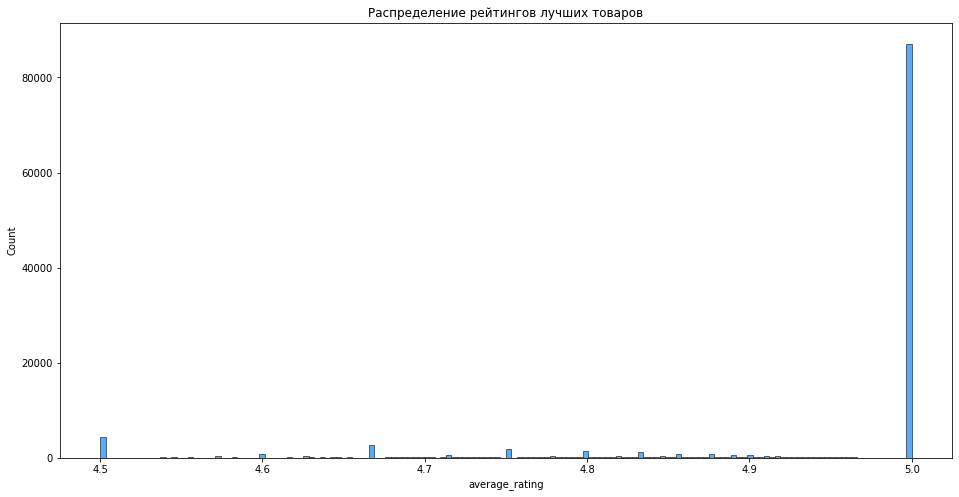

In [158]:
good_rating = rating.query(" average_rating >= 4.5 ")

plt.figure(figsize=(16, 8))
sns.histplot(good_rating.average_rating,  kde=False, color = '#1e90ff')
plt.title("Распределение рейтингов лучших товаров")

Для более лучшего исследования зависимости между продажами и рейтингом, я хочу сузить рамки наблюдений.

- возьмём товары с отзывами >= 4.5* (good_rating таблица)
- возьмем верхнюю границу для продаж в 5 млн руб

In [159]:
rating.describe()

ItemID      sales_rub  this_day_reviews_cnt  weighted_rating  \
count       148,767.00     148,767.00            148,767.00       148,767.00   
mean  1,017,052,494.17     500,026.05                 15.51            73.73   
std     436,579,683.40   2,073,423.61                 98.24           469.76   
min      32,115,742.00     -24,940.00                  1.00             1.00   
25%     661,446,843.50      37,120.50                  1.00             5.00   
50%   1,003,009,940.00     119,120.00                  2.00             9.00   
75%   1,410,221,797.00     365,163.77                  5.00            25.00   
max   1,801,580,744.00 193,847,042.08              7,817.00        37,067.51   

       average_rating  
count      148,767.00  
mean             4.60  
std              0.84  
min              1.00  
25%              4.64  
50%              5.00  
75%              5.00  
max              5.00

Не получается увидеть, разглядеть какую-то явную зависимость

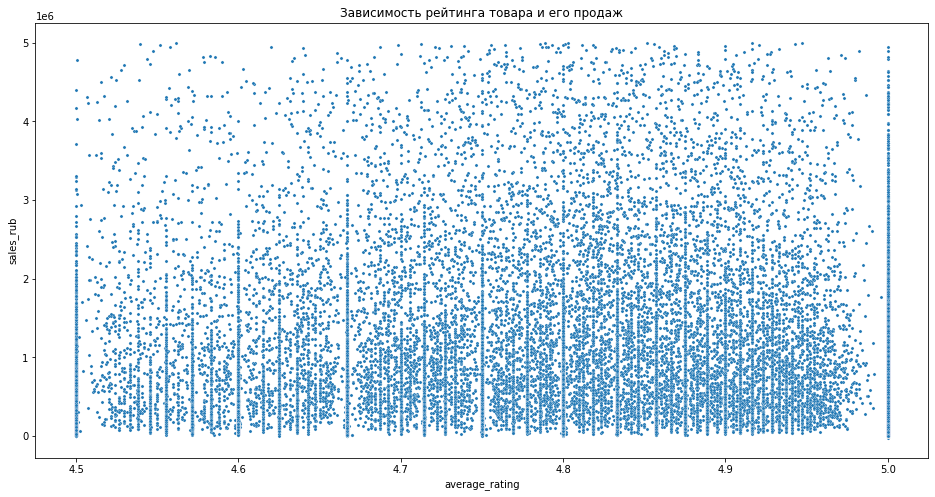

In [164]:
best_rating = good_rating.query(" sales_rub <= 5000000 ")

plt.figure(figsize=(16, 8))
sns.scatterplot(x = 'average_rating', y = 'sales_rub', data = best_rating, s = 10, palette = '#483d8b')
plt.title('Зависимость рейтинга товара и его продаж');

### Анализ динамики средней стоимости товара

- за рассматриваемый период времени средняя стоимость товара выросла с 4907 руб до 8152 руб
- особенно заметен стремительный рост средней стоимости товара в период начала СВО, однако после такого стремительного роста средняя стоимость товара стагнировала на протяжении почти полутора лет, в октябре 2023 рост продолжился
- интересно, что в июле 2023 года ЦБ России начал процедуру повышения ключевых ставок. В июле ставка была 7.5%, а уже к концу сентября достигла 13%.

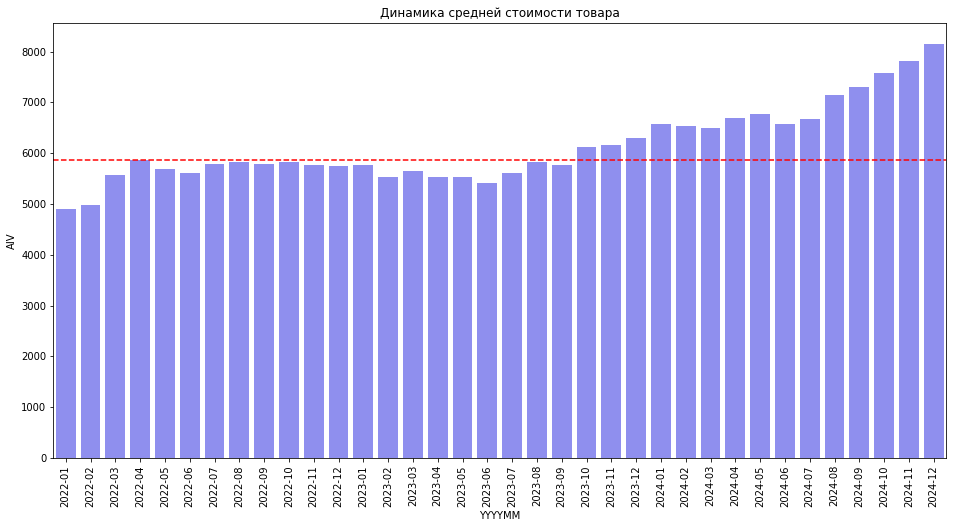

In [161]:
AIV_data = data \
    .groupby(['YYYYMM'], as_index = False) \
    .agg({'sales_rub': 'sum', 'qty': 'sum'})

AIV_data['AIV'] = AIV_data['sales_rub'] / AIV_data['qty']

plt.figure(figsize=(16, 8))
sns.barplot(data = AIV_data, y = 'AIV', x = 'YYYYMM', color = 'blue', alpha = 0.5)
plt.xticks(rotation = 90)
plt.title('Динамика средней стоимости товара');
plt.axhline(y=5861, color='red', linestyle='--', label='Уровень 0.5')

Динамика роста стоимости товаров в разных категориях 2-го уровня отличается

- мягкая мебель росла почти на всем рассматриваемом промежутке
- столы и стулья, а также мебель для сна достигли сначала своего максимума в марте-апреле 2022 года, после этого цена находилась ниже соответсвующих максимумов 2022 года.
- столы и стулья пробили максимум цены 2022 года в октябре 2023, мебель для сна - в декабре 2023

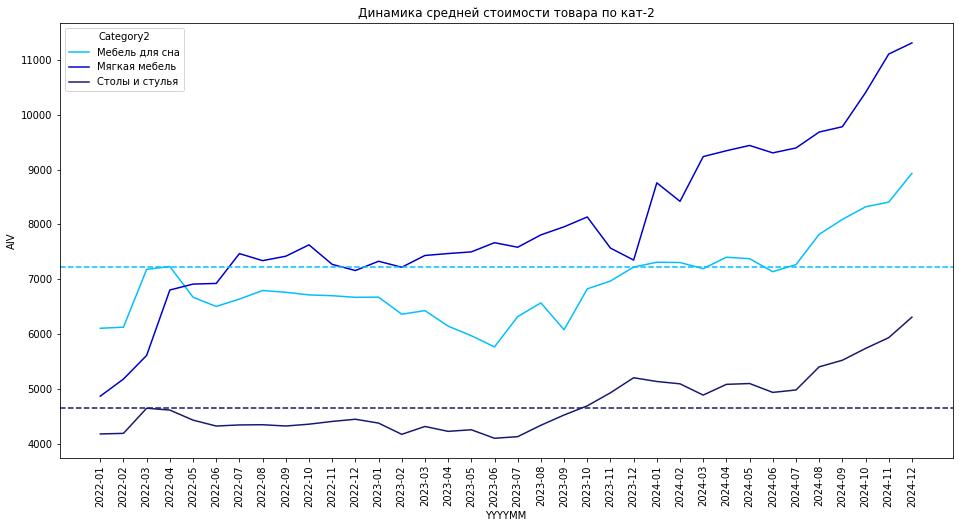

In [166]:
AIV_data = data \
    .groupby(['YYYYMM', 'Category2'], as_index = False) \
    .agg({'sales_rub': 'sum', 'qty': 'sum'})

AIV_data['AIV'] = AIV_data['sales_rub'] / AIV_data['qty']

AIV_data['YYYYMM'] = AIV_data['YYYYMM'].astype(str)

plt.figure(figsize=(16, 8))
sns.lineplot(data = AIV_data, y = 'AIV', x = 'YYYYMM', color = 'blue', hue = 'Category2', palette = ['#00bfff', '#0000cd', '#191970'])
plt.xticks(rotation = 90)
plt.title('Динамика средней стоимости товара по кат-2');

plt.axhline(y=4648.44, color='#191970', linestyle='--', label='Уровень 0.5')
plt.axhline(y=7231.89, color='#00bfff', linestyle='--', label='Уровень 0.5')

## Основные выводы

1. Наблюдается переток селлеров между схемами доставки товара. Происходит отток из FBS в FBO и RFBS. За рассматриваемый период доля товаров, которые сам маркетплейс доставляет до пользователя, упала с 87% до 73%.

2. Доля топ-100 брендов в обороте категории падает с 63.58% в начале периода до 54.05% в конце периода. Доля топ-100 селлеров в обороте категории падает с 53% до 41%. Происходит рассеивание продаж, процесс противоположный консолидации.

3. В начале 2024 года изменилась политика МП относительно промо-периодов. 

4. В данных есть месячная сезонность. Февраль и март 2022 сохраняют общую тенденцию с 2023 и 2024 годом.

5. Общее кол-во селлеров растёт (в разрезе любого оборота)

6. Медиана продаж селлеров стоит примерно на одном уровне

7. Растут продажи и относительная доля крупногабаритного товара. Есть вероятность, что менялась политика признания товара крупногабаритным

8. Существует устойчивая положительная линейная связь между просмотрами и продажами

9. Есть вероятность, что среднее кол-во заказов зависит от дня недели

10. Существует устойчивая положительная линейная связь между отзывами и продажами

11. Существует положительная нелинейная связь между рейтингом товара и продажами

12. 80% товаров с рейтингом (не NULL) имеют рейтинг выше 4.5*

13. Динамика средней стоимости товара может быть связана с ДКП ЦБ России. Что-то точно начало разгонять цены во второй половне 2023 года. 